# Milijonarji po svetu

 Ameriška revija Forbes vsako leto objavi seznam najbogatejših ljudi na svetu. Forbesova lestvica milijonarjev vsebuje podatke o premoženju, starosti, viru premoženja, državi porekla, rezidenci, številu otrkok in izobrazbi.
 Svojo analizo sem razdelil na štiri dele, kjer bom v prvem delu obravnaval porazdelitev milijonarjev in njihovega premoženja glede na državo iz katere izhajajo oziroma v kateri obratujejo. V drugem delu se bom posvetil starosti največjih svetovnih miljonarjev in poskušal ugotoviti, ali je morda opaziti kakšno povezavo med starostjo in premoženjem. Tretji del je posvečen izobrazbi in viru premoženja. Kakšna stopnja izobrazbe je prisotna pri večini milijonarjev in kakšna vrsta posla je najbolj dobičkonosna. Za konec se bom v četrtem delu posvetil osebnemu življenju milijonarjev in analiziral število otrok - kakšno je povprečno število otrok med milijonarji ter kakšna je povezava med številom otrok in premoženjem (če kakšna povezava sploh obstaja).
 

## Priprava tabel in podatkov

In [3]:
import pandas as pd
import itertools
%matplotlib inline

In [274]:
educ=pd.read_csv\
('C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Haskell Platform 7.10.3\Hll programi\Projekt\csv-datoteke\educ.csv',\
encoding = "ISO-8859-1")
milijonarjitab=pd.read_csv\
('C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Haskell Platform 7.10.3\Hll programi\Projekt\csv-datoteke\milijonarji.csv',\
encoding = "ISO-8859-1")
milijonarjidod1=pd.read_csv\
('C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Haskell Platform 7.10.3\Hll programi\Projekt\csv-datoteke\milijonarjidod.csv',\
encoding = "ISO-8859-1")
milijonarjidod=milijonarjidod1[['mesto','ime','rezidenca','stevilo_otrok']]
skupaj=pd.merge(milijonarjitab, milijonarjidod, on=['mesto', 'ime'], how='inner')
milijonarji=pd.merge(skupaj, educ, on=['mesto', 'ime'], how='inner')
pd.options.display.max_rows = 30

In [273]:
milijonarji

,mesto,ime,premozenje,starost,vir_premozenja,drzava,rezidenca,stevilo_otrok,izobrazba,sola
0,#1,Bill Gates,75.0,60,Microsoft,United States,"Medina, WA",3,Drop Out,Harvard University
1,#2,Amancio Ortega,67.0,80,Zara,Spain,"La Coruna, Spain",3,NaN,NaN
2,#3,Warren Buffett,60.8,85,Berkshire Hathaway,United States,"Omaha, NE",3,Bachelor of Arts / Science,University of Nebraska Lincoln; Master of Scie...
3,#5,Jeff Bezos,45.2,52,Amazon.com,United States,"Seattle, WA",4,Bachelor of Arts / Science,Princeton University
4,#6,Mark Zuckerberg,44.6,31,Facebook,United States,"Palo Alto, CA",NaN,Drop Out,Harvard University
5,#7,Larry Ellison,43.6,71,Oracle,United States,"Woodside, CA",2,Drop Out,"University of Chicago; Drop Out, University of..."
6,#8,Michael Bloomberg,40.0,74,Bloomberg LP,United States,"New York, NY",2,Bachelor of Arts / Science,Johns Hopkins University; Master of Business A...
7,#9,Charles Koch,39.6,80,diversified,United States,"Wichita, KS",2,Bachelor of Arts / Science,Massachusetts Institute of Technology; Master ...
8,#9,David Koch,39.6,75,diversified,United States,"New York, NY",3,Bachelor of Arts / Science,Massachusetts Institute of Technology; Master ...
9,#12,Larry Page,35.2,43,Google,United States,"Palo Alto, CA",1,Bachelor of Arts / Science,"University of Michigan; Master of Science, Sta..."


To je glavna tabela, ki bo služila za analizo. Sestavljena je iz dveh csv datotek. V prvi se nahajajo podatki iz tabele na Forbesovi strani, v drugi tabeli pa se nahajajo osebni podatki o milijonarjih, katere sem dobil tako, da sem obiskal posamezne strani z opisi milijonarjev na Forbesovi spletni strani in iz njih pobral dodatne osebne podatke. Na ta način sem prišel do podatkov o številu otrok, rezidenci ter izobrazbi.
 Premoženje je zapisano v bilijonih dolarjev, zato bomo enoto spremenili v milijarde EUR. Najprej bomo stolpec "premozenje" prekopirali v stolpec "premozenje_v_USD", v stolpec "premozenje" pa prepisali premoženje v milijardah EUR.

In [7]:
milijonarji['premozenje_v_USD']=milijonarji['premozenje']

In [8]:
milijonarji['premozenje']=milijonarji['premozenje_v_USD']*0.883470340
milijonarji

,mesto,ime,premozenje,starost,vir_premozenja,drzava,rezidenca,stevilo_otrok,izobrazba,sola,premozenje_v_USD
0,#1,Bill Gates,66.260276,60,Microsoft,United States,"Medina, WA",3,Drop Out,Harvard University,75.0
1,#2,Amancio Ortega,59.192513,80,Zara,Spain,"La Coruna, Spain",3,NaN,NaN,67.0
2,#3,Warren Buffett,53.714997,85,Berkshire Hathaway,United States,"Omaha, NE",3,Bachelor of Arts / Science,University of Nebraska Lincoln; Master of Scie...,60.8
3,#5,Jeff Bezos,39.932859,52,Amazon.com,United States,"Seattle, WA",4,Bachelor of Arts / Science,Princeton University,45.2
4,#6,Mark Zuckerberg,39.402777,31,Facebook,United States,"Palo Alto, CA",NaN,Drop Out,Harvard University,44.6
5,#7,Larry Ellison,38.519307,71,Oracle,United States,"Woodside, CA",2,Drop Out,"University of Chicago; Drop Out, University of...",43.6
6,#8,Michael Bloomberg,35.338814,74,Bloomberg LP,United States,"New York, NY",2,Bachelor of Arts / Science,Johns Hopkins University; Master of Business A...,40.0
7,#9,Charles Koch,34.985425,80,diversified,United States,"Wichita, KS",2,Bachelor of Arts / Science,Massachusetts Institute of Technology; Master ...,39.6
8,#9,David Koch,34.985425,75,diversified,United States,"New York, NY",3,Bachelor of Arts / Science,Massachusetts Institute of Technology; Master ...,39.6
9,#12,Larry Page,31.098156,43,Google,United States,"Palo Alto, CA",1,Bachelor of Arts / Science,"University of Michigan; Master of Science, Sta...",35.2


## Število milijonarjev glede na državo in povprečno premoženje na milijonarja po državi

 Eden od zanimivih podatkov je, v kateri državi je prisotno največ milijonarjev. Zato si poglejmo, katere države imajo največ milijonarjev

In [410]:
po_drzavah=milijonarji.groupby('drzava').size().sort_values(ascending=False)
po_drzavah

drzava
United States           324
China                    61
Germany                  60
Russia                   43
India                    37
Hong Kong                33
United Kingdom           22
Brazil                   22
Sweden                   20
Italy                    18
Canada                   16
South Korea              15
France                   15
Switzerland              15
Australia                11
                       ... 
United Arab Emirates      2
Cyprus                    1
Belgium                   1
Venezuela                 1
Liechtenstein             1
Georgia                   1
Greece                    1
Guernsey                  1
Morocco                   1
Portugal                  1
Qatar                     1
South Africa              1
Swaziland                 1
Ukraine                   1
Angola                    1
dtype: int64

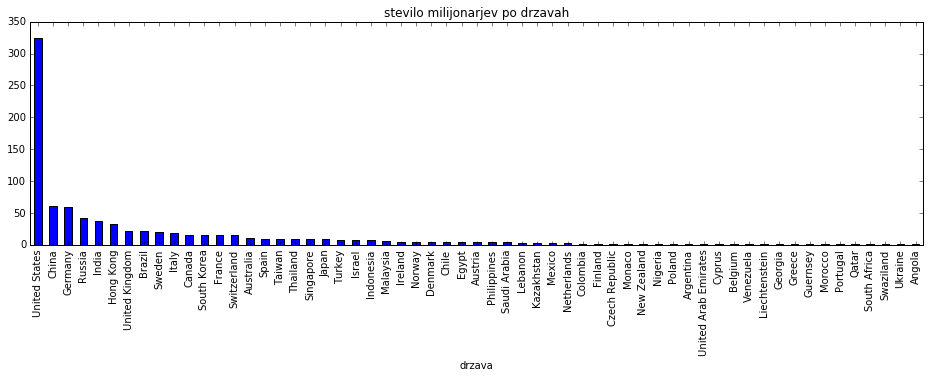

In [411]:
po_drzavah.plot(kind='bar',figsize=(16,4), title='stevilo milijonarjev po drzavah')

V zgornjem grafu lahko pri ZDA opazimo drastičen skok v številu milijonarjev glede na naslednje uvrščeno Kitajsko. 
Eden izmed razlogov za tak skok se lahko skriva tudi v dejstvu, da je Forbes ameriška revija in ima boljši pregled 
nad številom milijonarjev v ZDA. Sklepamo, da velika številka izhaja iz tega, da je evidentirano veliko ameriških milijonarjev
z manj premoženja, zato si poglejmo povprečno vrednost premoženja glede na državo.

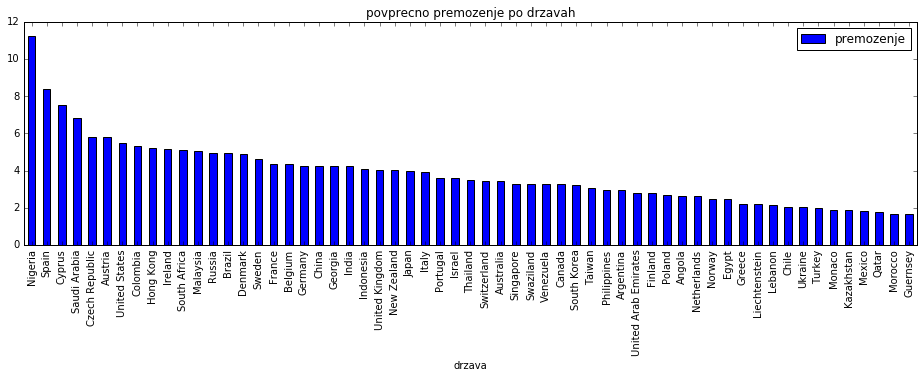

In [417]:
premozenje_po_drzavah=milijonarji[['premozenje','drzava']].groupby('drzava').mean().sort_values(ascending=False, by='premozenje')
premozenje_po_drzavah.plot(kind='bar',figsize=(16,4), title='povprecno premozenje po drzavah')

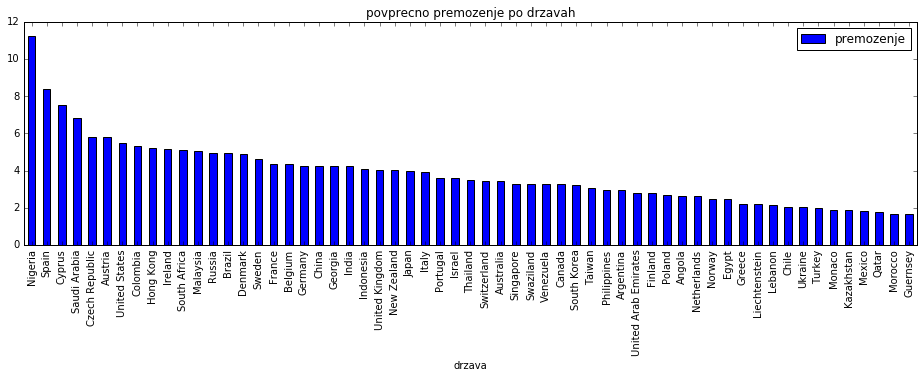

In [341]:
premozenje_po_drzavah.plot(kind='bar',figsize=(16,4), title='povprecno premozenje po drzavah')

Opazimo, da ima ta graf drugačno razporeditev od prejšnjega. V grafu povprečnega premoženja je ZDA na 7. mestu takoj za Češko republiko, ki pa je na 39. mestu po številu milijonarjev. To pomeni, da imajo ZDA več milijonarjev kot Češka republika, vendar imajo milijonarji v ZDA v povprečju manj premoženja od tistih v Češki republiki. 

## Povprečno premoženje glede na starost

Pogosto nas zanima, kako je premoženje razporejeno glede na starost, saj velja prepričanje, da je večino milijonarjev v srednjih letih. Najprej bomo pogledali, kako sta razporejena skupno in povprečno premoženje po letih in iz tega poskušali sklepati o zastopanosti po letih.

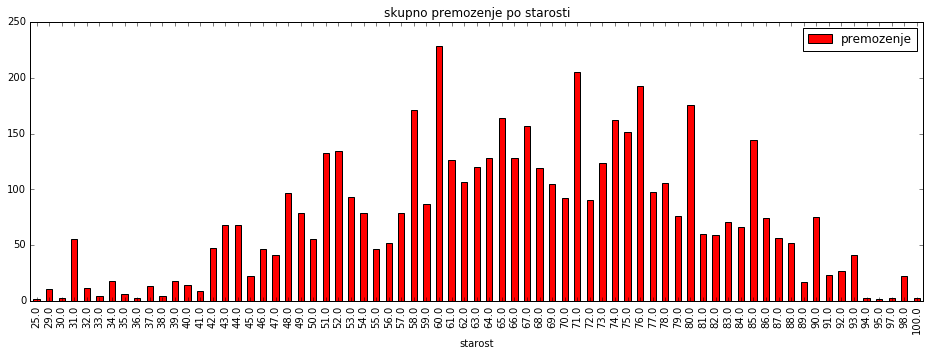

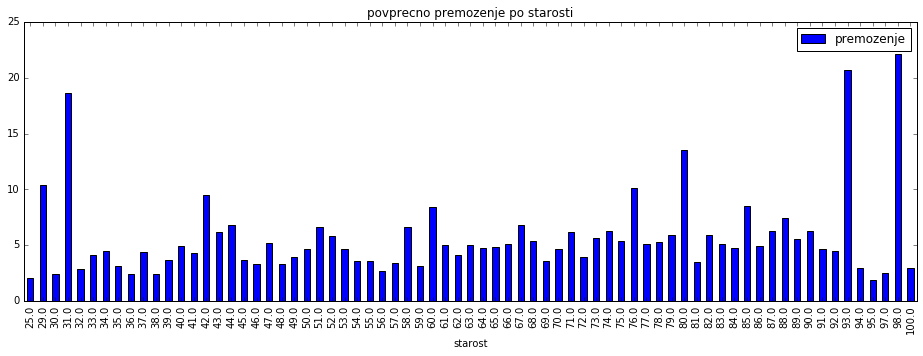

In [415]:
milijonarjitab.groupby('starost').sum().plot(kind='bar',color='r'\
                         ,figsize=(16,5)\
                         ,title='skupno premozenje po starosti')
milijonarjitab.groupby('starost').mean().plot(kind='bar',color='b'\
                         ,figsize=(16,5)\
                         ,title='povprecno premozenje po starosti')

Rdeč graf, ki predstavlja skupno premoženje po letih nam pove, da imajo večino premoženja ljudje nekje med 45. in 90. letom. Ko ga primerjamo z modrim grafom, ki predstavlja povprečno premoženje (skupno premoženje deljeno s številom ljudi, ki prispevajo k premoženju) ugotovimo, da je največ milijonarjev starih nekje med 45 in 90. Našo ugotovitev lahko potrdimo tako, da izrišemo graf s številom milijonarjev pri določeni starosti.

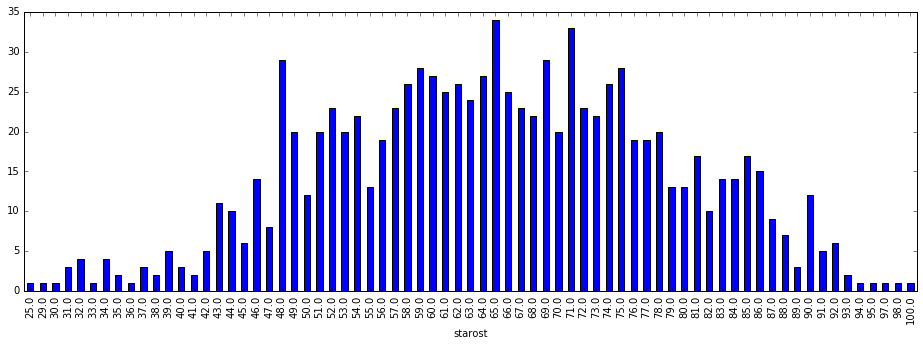

In [416]:
milijonarjitab.groupby('starost').size().plot(kind='bar',figsize=(16,5))


Na ta način smo ugotovili, da je res največ miljonarjev starih nekje med 40 in 90 let.

In [ ]:
Kot zanimivost si poglejmo še, kako je povprečna starost razporejena po državah.

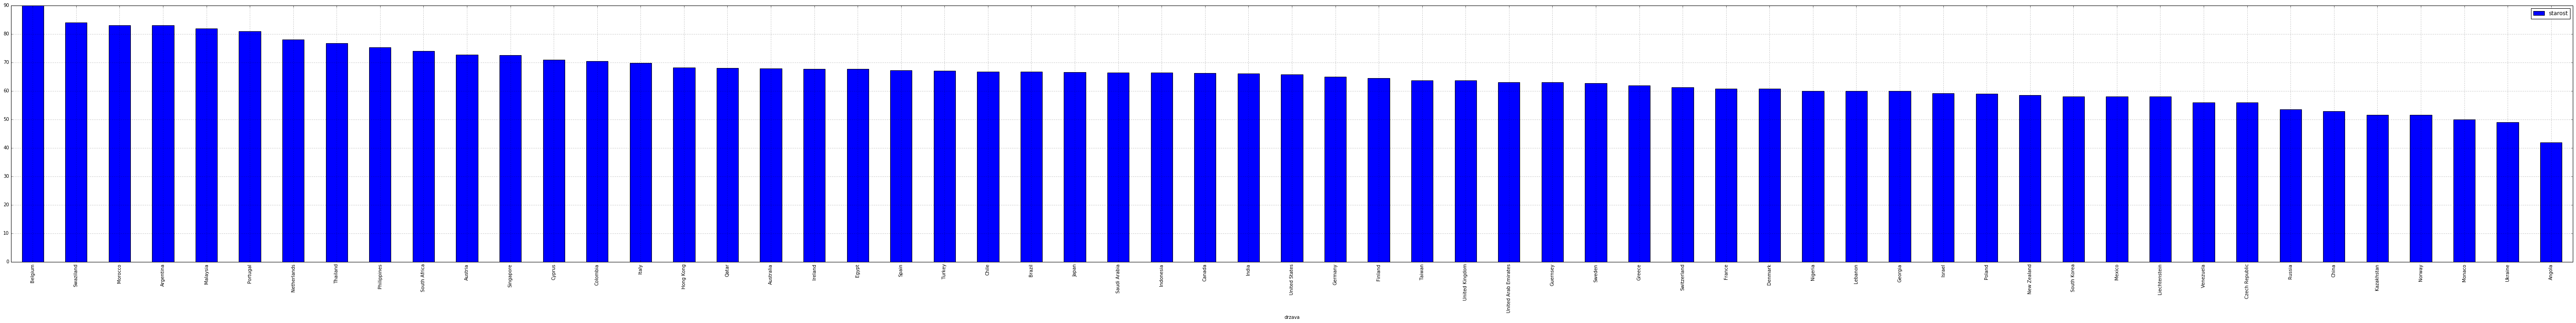

In [65]:
skupaj.groupby('drzava').mean()[['starost']]\
.sort_values(by='starost',ascending=False)\
.plot(kind='bar',figsize=(100,10), grid=True)

## Izobrazba milijonarjev

Poglejmo si kakšna je izobrazba svetovnih milijonarjev.
Najprej bi radi izvedeli, koliko milijonarjev ima določeno izobrazbo, zato bomo tabelo združili po izobrazbi in prešteli koliko je milijonarjev z določeno izobrazbo in rezultat uredili padajoče po številu.

In [442]:
milijonarji[['premozenje','izobrazba',]].groupby('izobrazba').size().sort_values(ascending=False)

izobrazba
Bachelor of Arts / Science                     381
Drop Out                                        39
Master of Business Administration               30
Diploma                                         20
Bachelor of Science in Engineering              15
Doctorate                                       13
Master of Science                                7
Master of Arts                                   6
LLB                                              5
Bachelor of Arts / Economics                     4
Associate in Arts / Science                      4
Medical Doctor                                   4
Ph.D                                             2
Doctor of Jurisprudence                          2
Master                                           1
Masters of Public Health                         1
B.Com                                            1
Sir John Cass College                            1
Registered Nurse                                 1
China Europe Internat

Vidimo, da ima največ milijonarjev diplomo iz umetnosti / znanosti. Zanimivo je, da je na drugem mestu število milijonarjev, ki študija niso dokončali. Rezultat sicer ni najbolj verjeten, saj veliko milijonarjev nima navedene izobrazbe, je pa vseeno zanimiv.

Poglejmo si še, iz katerih šol izhajajo največji svetovni milijonarji zaradi preglednosti si bomo ogledali samo prvih deset rezultatov.

In [448]:
milijonarji[['premozenje','sola']].groupby('sola').size().sort_values(ascending=False)[:10]


sola
High School                                  22
Harvard University                           18
Stanford University                           8
University of Southern California             7
University of Pennsylvania Wharton School     5
University of California, Los Angeles         5
Moscow State University                       5
New York University                           4
Delhi University                              4
Universidade Federal do Rio de Janeiro        4
dtype: int64

Eden od bolj zanimivih podatkov je vir premoženja, se pravi s katerim področjem se ukvarja največ milijonarjev.

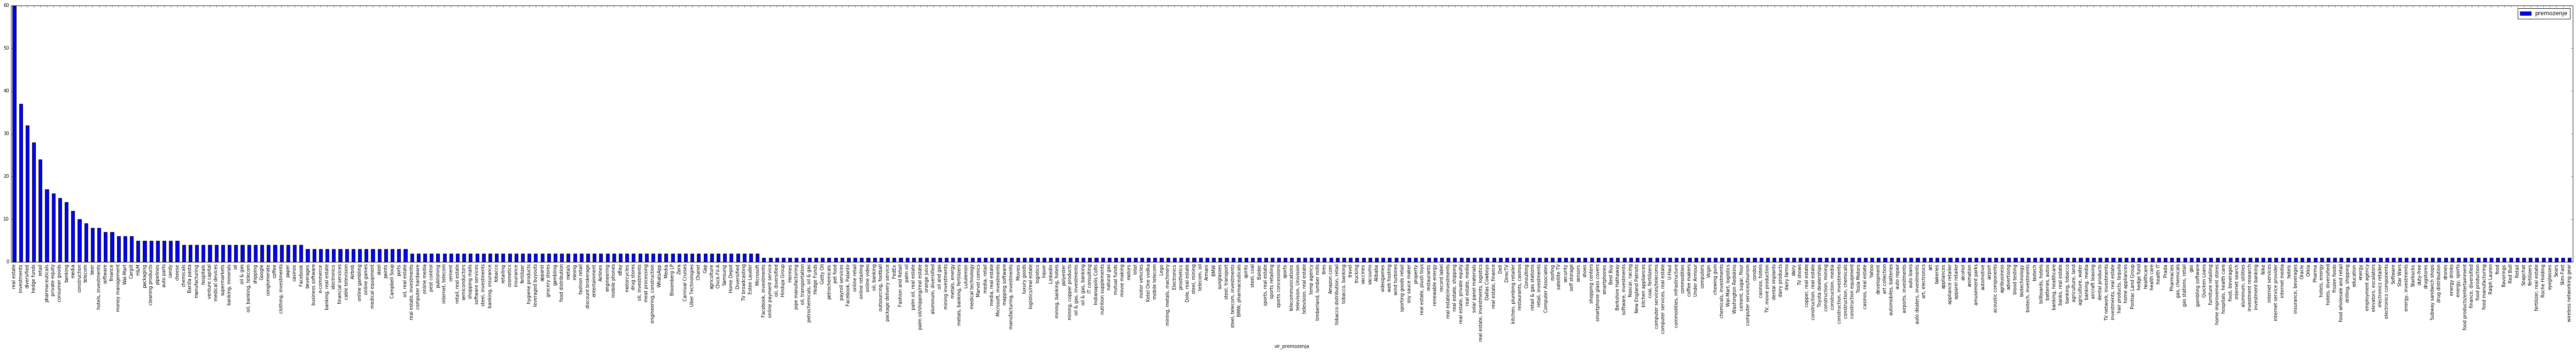

In [179]:
milijonarji[['premozenje','vir_premozenja',]].groupby('vir_premozenja').count().sort_values(by='premozenje',ascending=False).plot(kind='bar',figsize=(100,10))

Če pa količino premoženja, pridobljenega na določenem področju oziroma v določenem podjetju, delimo s številom ljudi, ki se s tem področjem ukvarja oziroma je pridobilo premoženje v tem podjetju, pa dobimo kako dobičkonosno je področje oziroma podjetje.

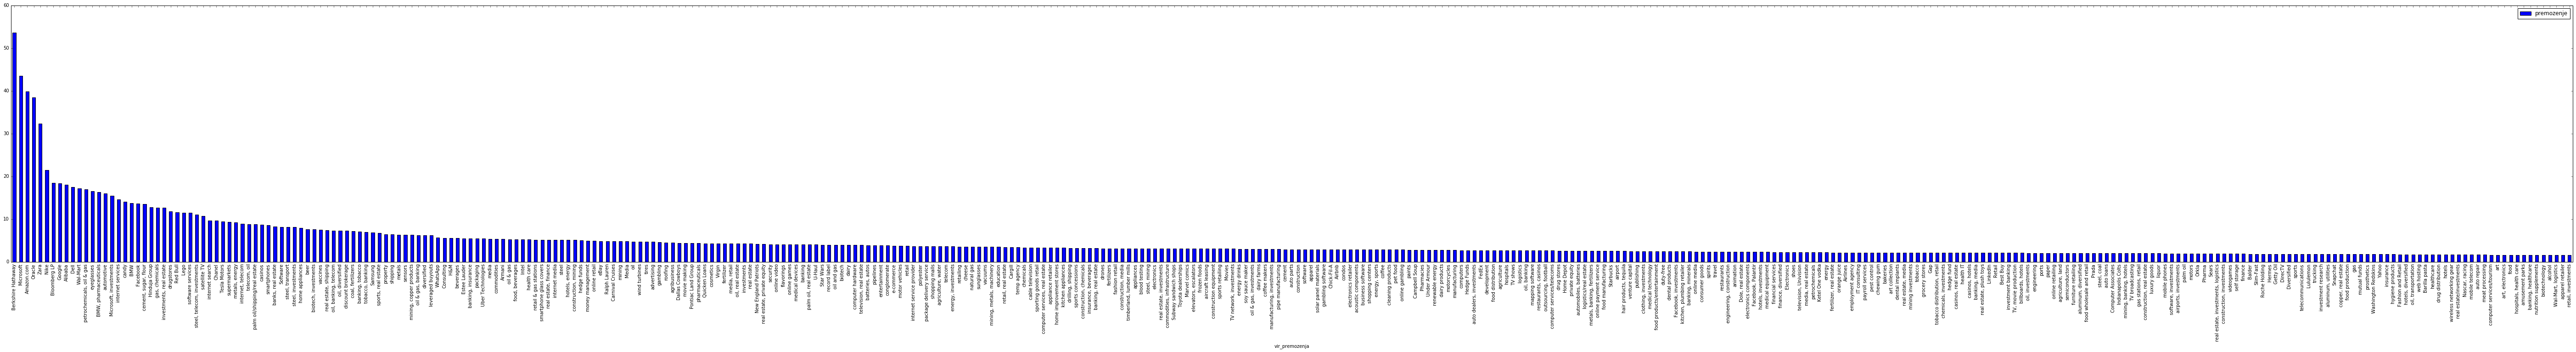

In [271]:
milijonarji[['premozenje','vir_premozenja',]].groupby('vir_premozenja').mean().sort_values(by='premozenje',ascending=False)\
.plot(kind='bar',figsize=(100,10))

##  Povprečno število otrok v odvisnosti od premoženja

Za konec pa si kot zanimivost poglejmo še koliko imajo svetovni milijonarji otrok. Najprej si bomo pogledali koliko otrok imajo v večini, zato bomo v v tabeli združili zapise po številu otrok in prešteli, kolikokrat se pojavi določeno število otrok.

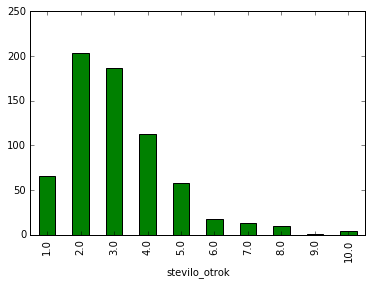

In [26]:
stevilo_otrok=skupaj[['ime','stevilo_otrok']].groupby('stevilo_otrok').count()
stevilo_otrok.plot(kind='bar',color='g',legend=False, subplots=False)


Na ta način smo ugotovili, da ima največ milijonarjev po dva otroka, sledijo jim tisti s tremi, na tretjem mestu pa so tisti s štirimi. Ta rezultat je potrebno jemati z rezervo, saj smo izgubili podatek koliko milijonarjev otrok nima. Program namreč pri združitvi zapisov zavrže vse zapise, kjer se pri številu otrok ne pojavi številka, se pravi, da zavrže vse, ki otrok nimajo oziroma ni podatka o njihovem številu.

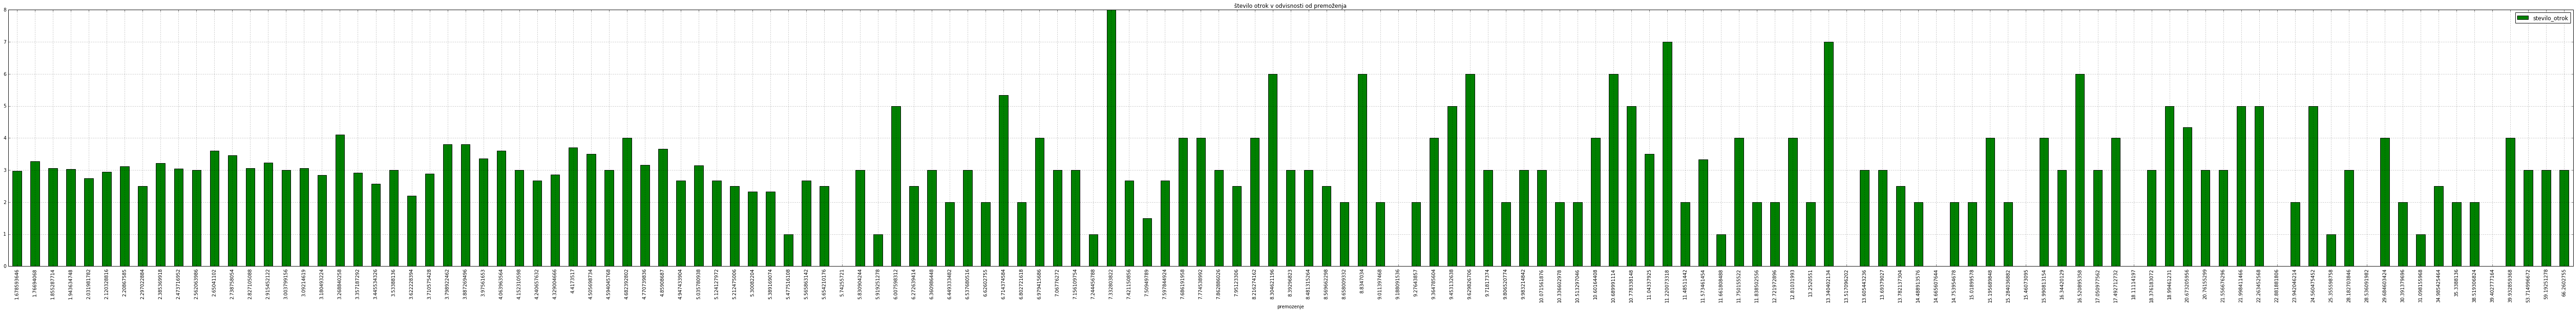

In [56]:
po_povp_stevilu_otrok=milijonarji[['premozenje','stevilo_otrok']].groupby('premozenje').mean()
po_povp_stevilu_otrok.plot(kind='bar'\
                           ,color='g'\
                           ,figsize=(100,10)\
                           ,grid=True\
                           ,title='število otrok v odvisnosti od premoženja')

Zgornji graf prikazuje povprečno število otrok v odvisnosti od premoženja. V prvem delu je graf dokaj "miren", saj se ne pojavi veliko odstopanj, v drugem delu pa postane bolj "divji" saj se začenjajo pojavljati različni hribi in doline.

In [ ]:
za konec si pa še poglejmo, kako sta povezana količina premoženja ter število otrok glede na državo izvora.

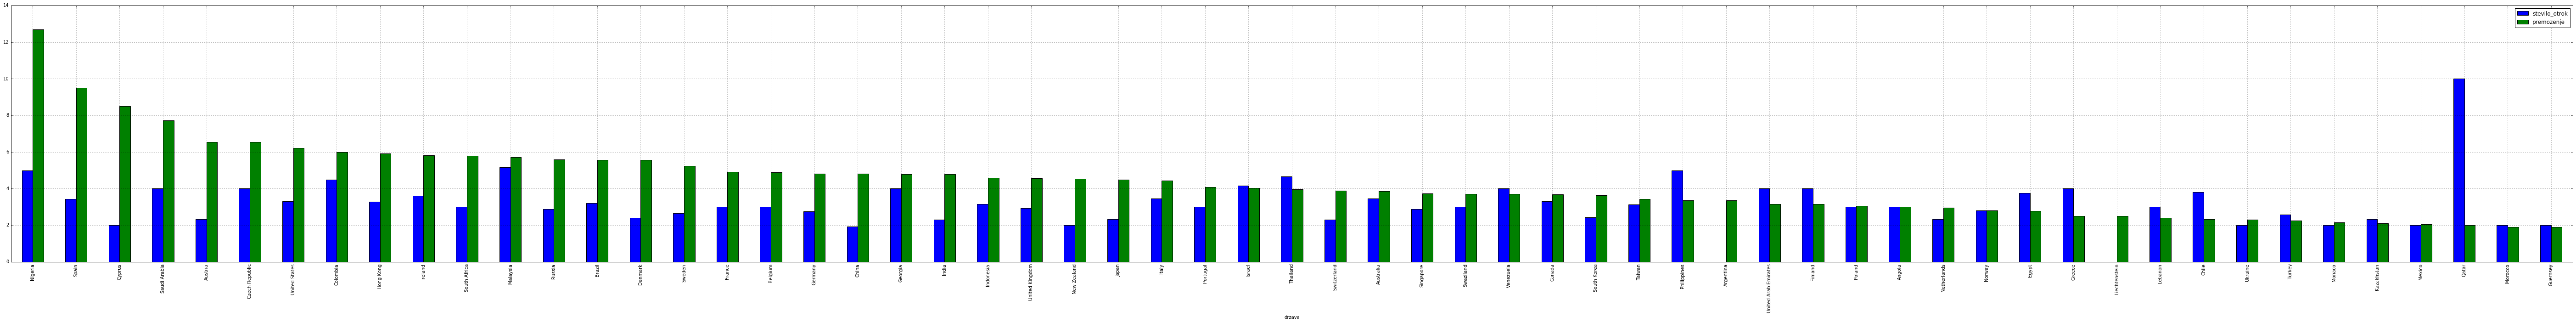

In [265]:
po_drzavah=skupaj.groupby('drzava').mean().sort_values(by='premozenje', ascending=False)[['stevilo_otrok','premozenje']]
po_drzavah.plot(kind='bar',figsize=(100,10), grid=True)